### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [45]:

##using python 2.0 for the assignment due to limited RAM in the laptop. As advised by the internal lab mentor 
## different results for K value and plotting and others in version 2.0 and version 3.0 
import numpy as np
import pandas as pd

In [46]:
df_vehicle = pd.read_csv('vehicle.csv')

In [47]:
df_vehicle.shape

(846, 19)

In [48]:
df_vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [49]:
df_vehicle.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [50]:
df_vehicle.dropna(inplace=True)

In [51]:
df_vehicle.shape
## checking the rows and columns after dropping the missing values from the data

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [25]:
import seaborn as sns
%matplotlib inline

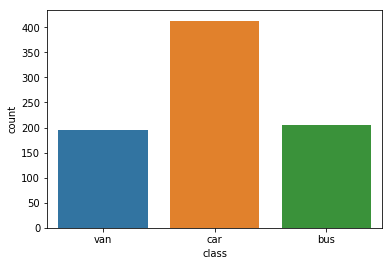

In [26]:
sns.countplot(x='class',data=df_vehicle)

### Check for any missing values in the data 

In [27]:
df_vehicle.isna().sum()

## there are NIL missing values in the data

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [28]:
df_vehicle_new=df_vehicle.drop('class', axis=1)

## dropping class variable since it is categorical to standardize the data 

In [29]:
df_vehicle_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [30]:
from scipy import stats
from scipy.stats import zscore

In [31]:
df_vehicle_new.apply(zscore)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040


In [43]:
df_vehicle_new.columns

Index([u'compactness', u'circularity', u'distance_circularity',
       u'radius_ratio', u'pr.axis_aspect_ratio', u'max.length_aspect_ratio',
       u'scatter_ratio', u'elongatedness', u'pr.axis_rectangularity',
       u'max.length_rectangularity', u'scaled_variance', u'scaled_variance.1',
       u'scaled_radius_of_gyration', u'scaled_radius_of_gyration.1',
       u'skewness_about', u'skewness_about.1', u'skewness_about.2',
       u'hollows_ratio'],
      dtype='object')

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [52]:
distortion=np.array([])

You can later use this array to plot the elbow plot

In [53]:
from sklearn.cluster import KMeans

### 5. Calculating distortion - C distance

In [54]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(df_vehicle_new)
    
    #Add cluster information for each record in dataframe
    #df_vehicle_new['k_' + str(i)] = 
    km.predict(df_vehicle_new)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

In [55]:
sse_df

,K,SSE
0,1.0,2.917617e+07
1,2.0,6.905477e+06
2,3.0,4.610991e+06
3,4.0,3.333244e+06
4,5.0,2.288297e+06
5,6.0,1.823916e+06
6,7.0,1.601418e+06
7,8.0,1.440457e+06
8,9.0,1.305791e+06
9,10.0,1.205642e+06


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

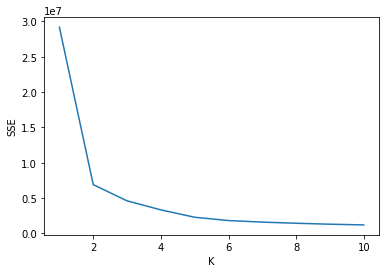

In [56]:
sns.lineplot(x='K', y='SSE', data=sse_df)

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
## OPTIMAL VALUE OF K IS AT 3 WHERE ELBOW IS SEEN,THOUGH THE ELBOW IS NOT SEEN VERY CLEARLY

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [62]:
km = KMeans(n_clusters=3)
km.fit(df_vehicle_new)
km.predict(df_vehicle_new)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0,

In [65]:
km.cluster_centers_[2]

array([ 96.21917808,  44.97260274,  88.11643836, 195.52054795,
        65.5       ,   8.94520548, 179.10273973,  36.73287671,
        21.19178082, 146.79452055, 202.3630137 , 485.78082192,
       174.59589041,  69.13013699,   5.90410959,  13.92465753,
       193.71917808, 200.33561644])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [66]:
df_centroid=pd.DataFrame(columns=df_vehicle_new.columns,data=np.array(km.cluster_centers_))

In [67]:
df_centroid

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,88.324034,41.206009,71.182403,146.615880,60.465665,7.963519,144.268240,46.757511,18.701717,140.263948,166.010730,310.313305,157.118026,73.399142,6.079399,10.912017,187.916309,193.982833
1,104.159204,53.019900,102.810945,202.029851,62.104478,9.820896,217.233831,30.706468,24.402985,166.373134,230.074627,700.870647,213.726368,72.457711,7.308458,15.905473,188.000000,196.432836
2,96.219178,44.972603,88.116438,195.520548,65.500000,8.945205,179.102740,36.732877,21.191781,146.794521,202.363014,485.780822,174.595890,69.130137,5.904110,13.924658,193.719178,200.335616


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [69]:
km.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [72]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

In [73]:
a.shape

(100, 2)

In [74]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

In [75]:
b.shape

(50, 2)

In [76]:
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [77]:
c.shape

(100, 2)

### 9. Combine all three arrays a,b,c into a dataframe

In [78]:
df_a=pd.DataFrame(a)
df_b=pd.DataFrame(b)
df_c=pd.DataFrame(c)

In [81]:
combine_df=df_a.append(df_b)

In [82]:
combine_df.shape

(150, 2)

In [83]:
combine_df_final=combine_df.append(df_c)

In [84]:
combine_df_final.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A747030>,
      dtype=object)

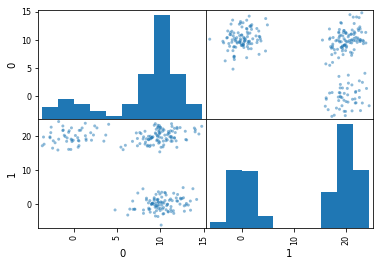

In [85]:
pd.plotting.scatter_matrix(combine_df_final)

## plotting using scatter matrix

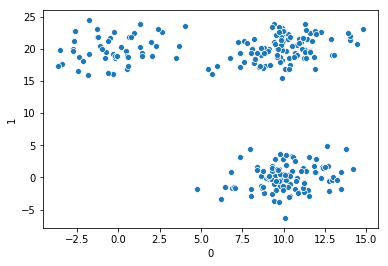

In [86]:
sns.scatterplot(x=0,y=1,data=combine_df_final)## display can be using scatter plot also

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [95]:
import scipy.cluster.hierarchy as shc

In [97]:
shc.linkage(combine_df_final.values, method='ward', metric='euclidean')

array([[7.60000000e+01, 8.80000000e+01, 1.76834549e-02, 2.00000000e+00],
       [2.26000000e+02, 2.30000000e+02, 2.21649349e-02, 2.00000000e+00],
       [1.69000000e+02, 1.76000000e+02, 3.51715566e-02, 2.00000000e+00],
       [4.50000000e+01, 5.00000000e+01, 3.64879664e-02, 2.00000000e+00],
       [2.60000000e+01, 6.80000000e+01, 6.45148571e-02, 2.00000000e+00],
       [2.21000000e+02, 2.52000000e+02, 6.91420078e-02, 3.00000000e+00],
       [1.65000000e+02, 2.19000000e+02, 7.19115756e-02, 2.00000000e+00],
       [8.00000000e+00, 9.70000000e+01, 7.98357619e-02, 2.00000000e+00],
       [2.14000000e+02, 2.16000000e+02, 9.50939436e-02, 2.00000000e+00],
       [4.00000000e+01, 7.70000000e+01, 9.64038797e-02, 2.00000000e+00],
       [7.50000000e+01, 2.50000000e+02, 1.02199217e-01, 3.00000000e+00],
       [1.92000000e+02, 2.35000000e+02, 1.10325459e-01, 2.00000000e+00],
       [3.40000000e+01, 9.60000000e+01, 1.12145980e-01, 2.00000000e+00],
       [2.20000000e+01, 5.60000000e+01, 1.20459682e

### 12. Plot the dendrogram for the consolidated dataframe

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

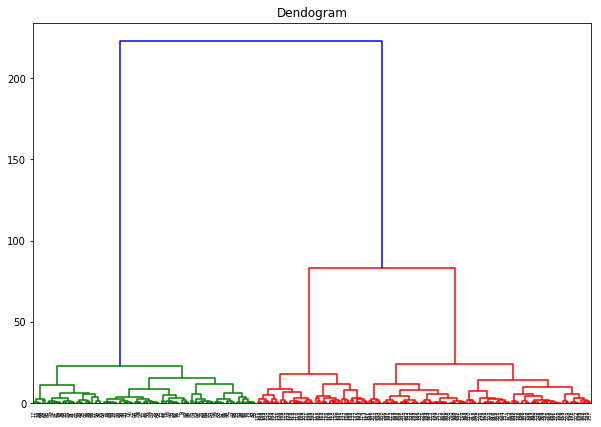

In [99]:
##plt.figure(figsize=(10,7))
##plt.title('Dendogram')
##dend = shc.dendrogram(shc.linkage(df.iloc[:,3:5].values, method='complete')
shc1=shc.linkage(combine_df_final.values, method='ward', metric='euclidean')
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc1)

### 13. Recreate the dendrogram for last 12 merged clusters 

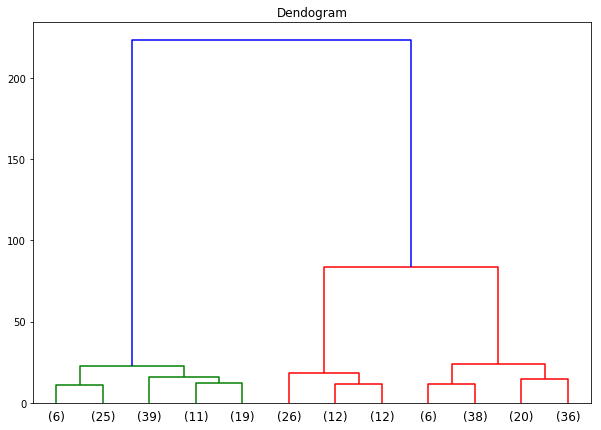

In [102]:
shc2=shc.linkage(combine_df_final.values, method='ward', metric='euclidean',)
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc2,truncate_mode='lastp',p=12)

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. Using this distance measure and AgglomerativeClustering() function to cluster the data into 3 different groups

In [100]:
from sklearn.cluster import AgglomerativeClustering

In [101]:
ac = AgglomerativeClustering(n_clusters=3)

In [105]:
combine_df_final['Cluster_3'] = ac.fit_predict(combine_df_final.values)

In [106]:
combine_df_final.Cluster_3.unique()

array([1, 2, 0], dtype=int64)

### 15. Use matplotlib to visually observe the clusters in 2D space 

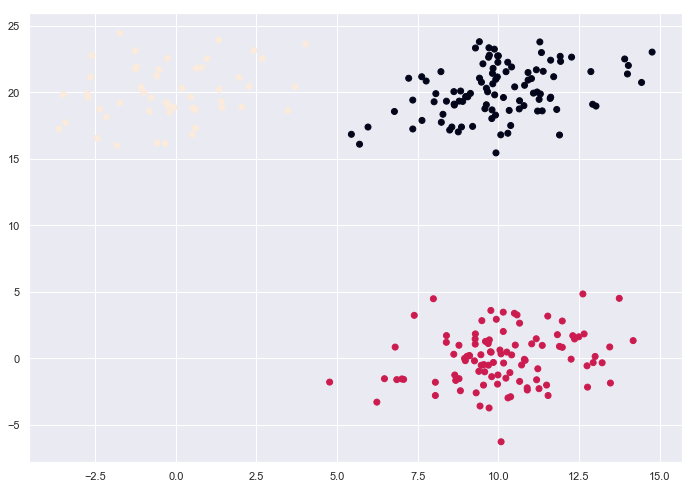

In [110]:
plt.figure()
plt.scatter(x=combine_df_final[0],y=combine_df_final[1],c=combine_df_final['Cluster_3'])

## scatter plot using matplotlib

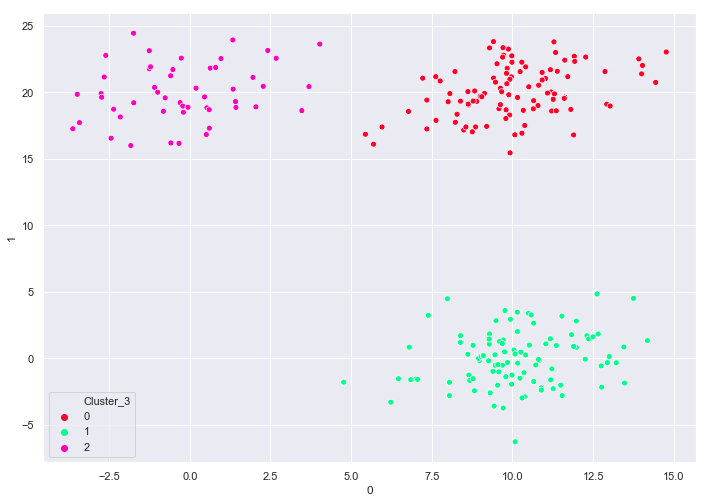

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=combine_df_final[0], y=combine_df_final[1], hue=combine_df_final['Cluster_3'], palette='gist_rainbow')

## scatter plot using seaborn